## EDA - Preprocessing of 'RTU.csv' data using python

'HVAC System: Electricity' column is identified as the target variable to be forecasted.

In [642]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [643]:
# loading the csv file as a data frame. The Timestamp column is parsed.
df = pd.read_csv('RTU.csv', parse_dates= ['Timestamp'])

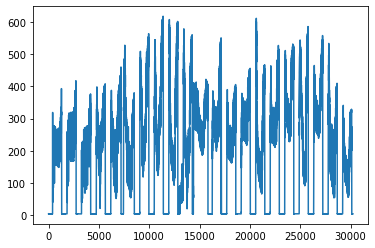

In [644]:
# Looking into the Target Variable before droping null values
plt.plot(df['HVAC System: Electricity'])

In [645]:
# Checking for null values
df.isnull().sum()

Timestamp                                   0
RTU: Supply Air Temperature             10084
RTU: Return Air Temperature             10084
RTU: Supply Air Fan Status                  0
RTU: Circuit 1 Discharge Temperature    15212
                                        ...  
VAV Box: Room 203 Air Temperature       10084
VAV Box: Room 204 Air Temperature       10084
VAV Box: Room 205 Air Temperature       10084
VAV Box: Room 206 Air Temperature       10084
Fault Detection Ground Truth                0
Length: 69, dtype: int64

In [646]:
# Looking at basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 69 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Timestamp                                        30240 non-null  datetime64[ns]
 1   RTU: Supply Air Temperature                      20156 non-null  float64       
 2   RTU: Return Air Temperature                      20156 non-null  float64       
 3   RTU: Supply Air Fan Status                       30240 non-null  int64         
 4   RTU: Circuit 1 Discharge Temperature             15028 non-null  float64       
 5   RTU: Circuit 1 Condenser Outlet Temperature      15028 non-null  float64       
 6   RTU: Circuit 1 Suction Temperature               15028 non-null  float64       
 7   RTU: Circuit 2 Discharge Temperature             15028 non-null  float64       
 8   RTU: Circuit 2 Condenser Outlet Temp

In [647]:
# Droping the null values
df = df.dropna()

In [648]:
# Checking head of data
df.head()

,Timestamp,RTU: Supply Air Temperature,RTU: Return Air Temperature,RTU: Supply Air Fan Status,RTU: Circuit 1 Discharge Temperature,RTU: Circuit 1 Condenser Outlet Temperature,RTU: Circuit 1 Suction Temperature,RTU: Circuit 2 Discharge Temperature,RTU: Circuit 2 Condenser Outlet Temperature,RTU: Circuit 2 Suction Temperature,...,VAV Box: Room 103 Air Temperature,VAV Box: Room 104 Air Temperature,VAV Box: Room 105 Air Temperature,VAV Box: Room 106 Air Temperature,VAV Box: Room 202 Air Temperature,VAV Box: Room 203 Air Temperature,VAV Box: Room 204 Air Temperature,VAV Box: Room 205 Air Temperature,VAV Box: Room 206 Air Temperature,Fault Detection Ground Truth
403,2017-08-27 06:43:00,67.22,74.72,1,92.2,75.87,58.50,75.88,70.95,70.92,...,69.04,69.54,69.52,70.06,69.85,69.22,69.79,69.47,70.09,1
404,2017-08-27 06:44:00,62.92,74.76,1,119.2,96.10,59.00,73.93,69.79,71.32,...,66.86,67.77,67.92,68.94,67.38,65.89,67.17,66.57,67.71,1
405,2017-08-27 06:45:00,61.00,74.70,1,133.7,106.30,55.05,73.54,69.30,71.47,...,64.79,65.85,66.06,67.38,65.22,63.40,64.95,64.24,65.58,1
406,2017-08-27 06:46:00,58.69,74.57,1,144.1,123.90,49.69,117.00,92.00,49.95,...,63.08,64.25,64.39,65.91,63.35,61.47,63.06,62.38,63.79,1
407,2017-08-27 06:47:00,56.98,74.46,1,157.1,138.30,50.53,160.80,114.70,50.92,...,61.08,62.32,62.54,64.23,61.12,59.18,60.93,60.27,61.78,1


In [649]:
# Checking for Duplicates
df.duplicated().sum()

0

In [650]:
# Looking the column names of the data
df.columns

Index(['Timestamp', 'RTU: Supply Air Temperature',
       'RTU: Return Air Temperature', 'RTU: Supply Air Fan Status',
       'RTU: Circuit 1 Discharge Temperature',
       'RTU: Circuit 1 Condenser Outlet Temperature',
       'RTU: Circuit 1 Suction Temperature',
       'RTU: Circuit 2 Discharge Temperature',
       'RTU: Circuit 2 Condenser Outlet Temperature',
       'RTU: Circuit 2 Suction Temperature',
       'RTU: Circuit 1 Discharge Pressure',
       'RTU: Circuit 1 Condenser Outlet Pressure',
       'RTU: Circuit 1 Suction Pressure', 'RTU: Circuit 2 Discharge Pressure',
       'RTU: Circuit 2 Condenser Outlet Pressure',
       'RTU: Circuit 2 Suction Pressure',
       'RTU: Supply Air Volumetric Flow Rate', 'RTU: Electricity',
       'RTU: Natural Gas', 'Occupancy Mode Indicator',
       'Terminal: Room 102 Air Humidity', 'Terminal: Room 103 Air Humidity',
       'Terminal: Room 104 Air Humidity', 'Terminal: Room 105 Air Humidity',
       'Terminal: Room 106 Air Humidity', 'Ter

In [651]:
# Checking data type of the columns
df.dtypes

Timestamp                               datetime64[ns]
RTU: Supply Air Temperature                    float64
RTU: Return Air Temperature                    float64
RTU: Supply Air Fan Status                       int64
RTU: Circuit 1 Discharge Temperature           float64
                                             ...      
VAV Box: Room 203 Air Temperature              float64
VAV Box: Room 204 Air Temperature              float64
VAV Box: Room 205 Air Temperature              float64
VAV Box: Room 206 Air Temperature              float64
Fault Detection Ground Truth                     int64
Length: 69, dtype: object

In [652]:
# Checking for Object data type in the data frame
df.select_dtypes('object')
# No object type data was found

""
403
404
405
406
407
...
17154
17157
17160
20586


In [653]:
# Pre-processing Discrete Variables 
dis = list(df.select_dtypes('int64').columns)
print(dis)

drop1 = []
for i in dis:
    if df[i].nunique() == 1:
        print(i)
        drop1.append(i)

df = df.drop(df[drop1],1)

['RTU: Supply Air Fan Status', 'Occupancy Mode Indicator', 'Lighting System: Control Command', 'RTU: Compressor 1 On/Off Status', 'RTU: Compressor 2 On/Off Status', 'VAV Box: Room 102 Reheat Status', 'VAV Box: Room 103 Reheat Status', 'VAV Box: Room 104 Reheat Status', 'VAV Box: Room 105 Reheat Status', 'VAV Box: Room 106 Reheat Status', 'VAV Box: Room 202 Reheat Status', 'VAV Box: Room 203 Reheat Status', 'VAV Box: Room 204 Reheat Status', 'VAV Box: Room 205 Reheat Status', 'VAV Box: Room 206 Reheat Status', 'Fault Detection Ground Truth']
RTU: Supply Air Fan Status
Fault Detection Ground Truth


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\2171359618.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(df[drop1],1)


Exploring the Target Variable 'HVAC System: Electricity'

In [654]:
df['HVAC System: Electricity'].describe()

count    2867.000000
mean      227.229497
std        77.476805
min        49.052050
25%       173.510455
50%       201.785140
75%       267.759259
max       579.252110
Name: HVAC System: Electricity, dtype: float64

In [655]:
# Removing Highly correlated Columns
cor_matrix = df.corr().abs()
print(cor_matrix)

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

df1 = df.drop(df[to_drop], axis=1)
print(df1.head())

                                             RTU: Supply Air Temperature  \
RTU: Supply Air Temperature                                     1.000000   
RTU: Return Air Temperature                                     0.279478   
RTU: Circuit 1 Discharge Temperature                            0.124264   
RTU: Circuit 1 Condenser Outlet Temperature                     0.045064   
RTU: Circuit 1 Suction Temperature                              0.418880   
...                                                                  ...   
VAV Box: Room 202 Air Temperature                               0.330121   
VAV Box: Room 203 Air Temperature                               0.155062   
VAV Box: Room 204 Air Temperature                               0.173097   
VAV Box: Room 205 Air Temperature                               0.075043   
VAV Box: Room 206 Air Temperature                               0.097592   

                                             RTU: Return Air Temperature  \
RTU: Supply

C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\3886850270.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [656]:
print(df.shape)
print(df1.shape)

(2867, 67)
(2867, 54)


In [657]:
# Outlier Treatment - capping 
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df
df=cap_data(df1)

capping the  Timestamp
capping the  RTU: Supply Air Temperature
capping the  RTU: Return Air Temperature
capping the  RTU: Circuit 1 Discharge Temperature
capping the  RTU: Circuit 1 Condenser Outlet Temperature


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  RTU: Circuit 1 Suction Temperature
capping the  RTU: Circuit 2 Discharge Temperature


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  RTU: Circuit 2 Suction Temperature
capping the  RTU: Circuit 1 Condenser Outlet Pressure
capping the  RTU: Circuit 1 Suction Pressure


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  RTU: Circuit 2 Discharge Pressure
capping the  RTU: Circuit 2 Suction Pressure
capping the  RTU: Supply Air Volumetric Flow Rate


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  RTU: Electricity
capping the  RTU: Natural Gas
capping the  Occupancy Mode Indicator


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  Terminal: Room 102 Air Humidity
capping the  Terminal: Room 104 Air Humidity
capping the  Terminal: Room 106 Air Humidity


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  Terminal: Room 102 Air Temperature
capping the  Terminal: Room 103 Air Temperature
capping the  Terminal: Room 104 Air Temperature


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  Terminal: Room 105 Air Temperature
capping the  Terminal: Room 106 Air Temperature
capping the  Terminal: Room 202 Air Temperature
capping the  Terminal: Room 203 Air Temperature


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  Terminal: Room 204 Air Temperature
capping the  Terminal: Room 205 Air Temperature
capping the  Terminal: Room 206 Air Temperature


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  HVAC System: Electricity
capping the  Lighting System: Electricity
capping the  Lighting System: Control Command


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  RTU: Compressor 1 On/Off Status
capping the  RTU: Compressor 2 On/Off Status
capping the  VAV Box: Room 102 Reheat Status


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  VAV Box: Room 103 Reheat Status
capping the  VAV Box: Room 104 Reheat Status
capping the  VAV Box: Room 105 Reheat Status


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  VAV Box: Room 106 Reheat Status
capping the  VAV Box: Room 202 Reheat Status
capping the  VAV Box: Room 203 Reheat Status


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  VAV Box: Room 204 Reheat Status
capping the  VAV Box: Room 205 Reheat Status
capping the  VAV Box: Room 206 Reheat Status


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  VAV Box: Room 102 Air Temperature
capping the  VAV Box: Room 103 Air Temperature
capping the  VAV Box: Room 104 Air Temperature


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  VAV Box: Room 105 Air Temperature
capping the  VAV Box: Room 106 Air Temperature
capping the  VAV Box: Room 202 Air Temperature


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  VAV Box: Room 203 Air Temperature
capping the  VAV Box: Room 204 Air Temperature
capping the  VAV Box: Room 205 Air Temperature


C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_7760\138137973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  VAV Box: Room 206 Air Temperature


In [658]:
df.head()

,Timestamp,RTU: Supply Air Temperature,RTU: Return Air Temperature,RTU: Circuit 1 Discharge Temperature,RTU: Circuit 1 Condenser Outlet Temperature,RTU: Circuit 1 Suction Temperature,RTU: Circuit 2 Discharge Temperature,RTU: Circuit 2 Suction Temperature,RTU: Circuit 1 Condenser Outlet Pressure,RTU: Circuit 1 Suction Pressure,...,VAV Box: Room 102 Air Temperature,VAV Box: Room 103 Air Temperature,VAV Box: Room 104 Air Temperature,VAV Box: Room 105 Air Temperature,VAV Box: Room 106 Air Temperature,VAV Box: Room 202 Air Temperature,VAV Box: Room 203 Air Temperature,VAV Box: Room 204 Air Temperature,VAV Box: Room 205 Air Temperature,VAV Box: Room 206 Air Temperature
403,2017-08-27 06:43:00,63.7804,74.6834,92.2,75.87,58.50,75.88,70.92,-441.3,142.7,...,69.36,65.3974,69.54,69.52,70.06,67.9134,69.22,69.79,69.47,70.09
404,2017-08-27 06:44:00,62.9200,74.6834,119.2,96.10,59.00,73.93,71.32,-381.0,161.6,...,67.31,65.3974,67.77,67.92,68.94,67.3800,65.89,67.17,66.57,67.71
405,2017-08-27 06:45:00,61.0000,74.6834,133.7,106.30,55.05,73.54,71.47,-348.3,162.4,...,65.34,64.7900,65.85,66.06,67.38,65.2200,63.40,64.95,64.24,65.58
406,2017-08-27 06:46:00,58.6900,74.5700,144.1,123.90,49.69,117.00,49.95,-267.1,158.6,...,63.69,63.0800,64.25,64.39,65.91,63.3500,61.47,63.06,62.38,63.79
407,2017-08-27 06:47:00,56.9800,74.4600,157.1,130.10,50.53,160.80,50.92,-203.6,160.9,...,61.77,61.0800,62.32,62.54,64.23,61.1200,59.18,60.93,60.27,61.78


In [659]:
df.to_csv('datapreprocessed.csv', index=False)